<a href="https://colab.research.google.com/github/ZiyadAlmatrafi/Data-science/blob/master/ML/sec9/assignment_logistc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression
Using the same seattle weather data as last chapter develop a linear regression model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
regression_df = pd.DataFrame({'today':[0.0] * numrows,
                             'tomorrow':[True] * numrows}) #initalize as boolean

#sort columns for convience
seq = ['today',
       'tomorrow']

regression_df = regression_df.reindex(columns=seq)

In [2]:
#populate the regression data frame with values from the pandas dataframe
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    regression_df.iat[i,1] = tomorrow
    regression_df.iat[i,0] = today

regression_df = regression_df.dropna() #exclude any rows with missing data

In [3]:
regression_df.head(20)

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True
5,0.17,True
6,0.44,True
7,0.41,True
8,0.04,True
9,0.12,True


In [4]:
from sklearn import linear_model
#modify the data to work with this model
x = regression_df.today.values
y = regression_df.tomorrow.values
x = x.reshape(regression_df.shape[0], 1)
#note that we did not need to reshape the y values as we did with linear regression

In [5]:
clf = linear_model.LogisticRegression(solver='lbfgs').fit(x, y)

In [6]:
#we can calculate the accuarcy using the score method
score = clf.score(x,y)
print(score)

0.6707116574023331


In [7]:
from sklearn import metrics
#we can also make a simple confusion matrix
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[13431  1213]
 [ 7199  3703]]


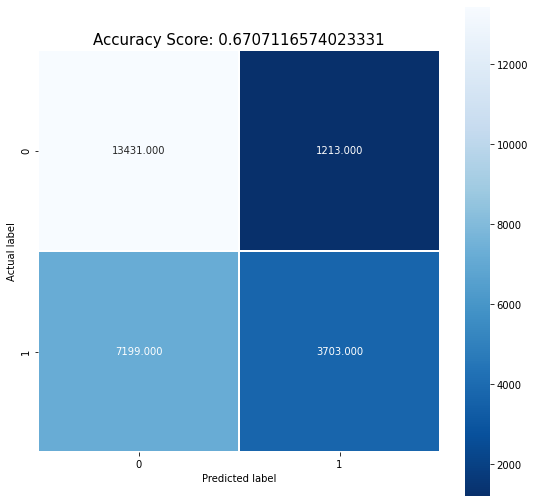

In [8]:
#Here is a bit nicer matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### From this point modify the scikit-learn logistic regression method to use two variables.
Hint. Your x values should have the same number of rows but two columns. You will not be able to plot the line (as it will be 3 dimensional) but you can plot the model predictions agains the actual values.

In [9]:
numrows = 25547 

###################### adjust this code to add columns here #######################################
regression_df = pd.DataFrame({#'yesterday':[0.0]*numrows,
                              'today':[0.0]*numrows,
                             'tomorrow':[True]*numrows})

#sort columns for convience
seq = [#'yesterday',
       'today',
       'tomorrow']

regression_df = regression_df.reindex(columns=seq)

for i in range(0 , numrows):
   # yesterday = df.iloc[(i-2),1]
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
   # regression_df.iat[i,-1] = yesterday
    regression_df.iat[i,1] = tomorrow
    regression_df.iat[i,0] = today

regression_df = regression_df.dropna() #exclude any rows with missing data
#####################################################################################################

In [10]:
regression_df.describe

<bound method NDFrame.describe of        today  tomorrow
0       0.00      True
1       0.47      True
2       0.59      True
3       0.42      True
4       0.31      True
...      ...       ...
25542   0.00     False
25543   0.00     False
25544   0.00     False
25545   0.00     False
25546   0.00     False

[25544 rows x 2 columns]>

In [15]:
regression_df.head(20)

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True
5,0.17,True
6,0.44,True
7,0.41,True
8,0.04,True
9,0.12,True


In [16]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(solver='liblinear')
x = regression_df.today.values
y = regression_df.tomorrow.values
x = x.reshape(regression_df.shape[0], 1)

In [18]:
MLA = LogisticRegression(fit_intercept=False)
MLA.fit(x,y)
score = MLA.score(x,y)
              
print('accuracy score:', score)

accuracy score: 0.7110867522705919


In [ ]:
predictions = MLA.predict(x)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[10953  3689]
 [ 3691  7211]]


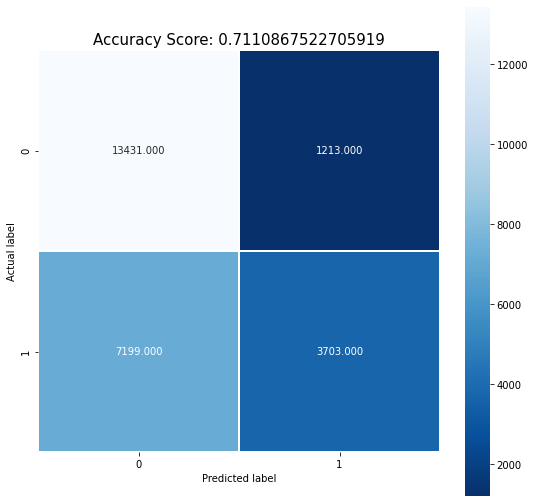

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);